In [11]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import random

In [12]:
data = np.load('cifar-10.npz')

train_images = data['x_train']
train_labels = data['y_train']
test_images = data['x_test']
test_labels = data['y_test']

print("CIFAR-10 dataset loaded successfully from .npz file.")

CIFAR-10 dataset loaded successfully from .npz file.


In [13]:

unique_labels = np.unique(train_labels)
print("Unique train labels:", np.unique(train_labels))


Unique train labels: [0 1 2 3 4 5 6 7 8 9]


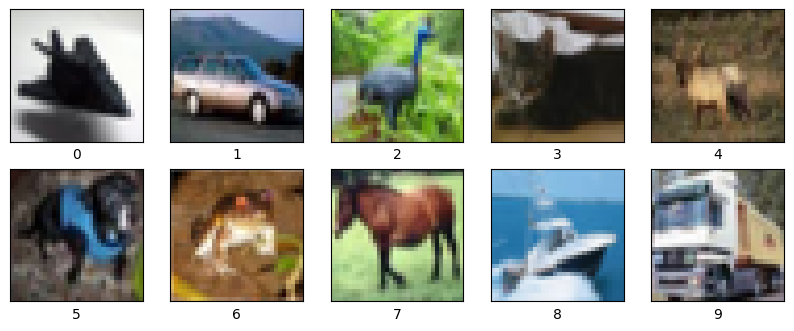

In [14]:
plt.figure(figsize=(10, 10))
for i in range(len(unique_labels)):
    label = unique_labels[i]
    idx = np.where(train_labels == label)[0][0]  # Get the index of the first occurrence of this label
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[idx])  # Display image corresponding to this unique label
    plt.xlabel(label) 
plt.show()

In [15]:
print('train_images shape:', train_images.shape)
print('train_labels shape:', train_labels.shape)
print('test_images shape:', test_images.shape)
print('test_labels shape:', test_labels.shape)

train_images shape: (50000, 32, 32, 3)
train_labels shape: (50000, 1)
test_images shape: (10000, 32, 32, 3)
test_labels shape: (10000, 1)


In [16]:
# Maximum pixel value across train and test images
max_val = max(train_images.max(), test_images.max())
print(f"Max value used for normalization: {max_val}")

Max value used for normalization: 255


In [17]:
# Normalize the data & One hot encode the labels



# Normalize images to range 0-1
train_images = train_images.astype('float32') / max_val
test_images  = test_images.astype('float32') / max_val


# One-hot encoding the labels
y_train_cat = to_categorical(train_labels, num_classes=10)
y_test_cat  = to_categorical(test_labels, num_classes=10)

# Matches the network’s softmax output ( probability distribution over 10 classes)
# Example with 10 classes:
# Label = 3 → [0,0,0,1,0,0,0,0,0,0]
# Label = 7 → [0,0,0,0,0,0,0,1,0,0]

In [18]:
print(f"train_images shape: {train_images.shape}, dtype: {train_images.dtype}")
print(f"train_labels shape: {train_labels.shape}, dtype: {train_labels.dtype}")

train_images shape: (50000, 32, 32, 3), dtype: float32
train_labels shape: (50000, 1), dtype: uint8


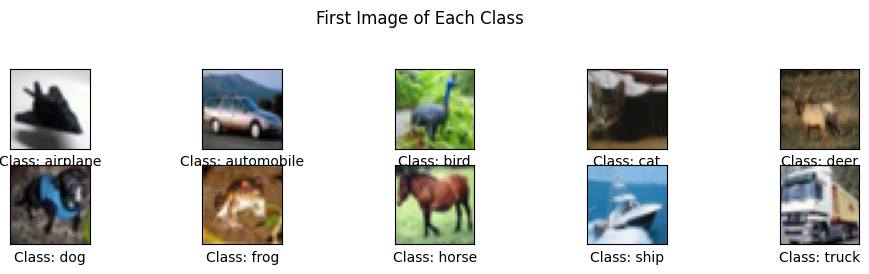

In [19]:
# Visualize the images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12, 6))
plt.suptitle('First Image of Each Class')

for i in range(len(unique_labels)):
    label = unique_labels[i]
    index = np.where(train_labels == label)[0][0]
    
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[index]) 
    plt.xlabel(f"Class: {class_names[label]}")
    plt.xticks([])
    plt.yticks([])
plt.show() 

In [20]:
# Build the model
# Conv2D: extracts features (edges, textures, patterns) using filters
    # each filter is like a feature/pattern detector ( vertical lines , edges etc ) stacking filters together larger features can be detected
    # the filter goes through strides over whole image and performs convolution operation , 
    # result is a matrix that represents simlilarness of the filter to the input image matrix 


# MaxPooling: downsamples feature maps, keeps strongest features, reduces size & overfitting
    # used after convolution layers to reduce size of intermediate features ( downsampling ) 
    # extracts dominant features only
    #  eg : 4x4 -> 2x2 with max pooling 
    # reduce the total no of filter layers required ( avoiding vanishing gradient and lower compute ) 
    
# BatchNormalization() is a layer that normalizes the outputs of the previous layer so they have a stable mean and variance during training.
    # Keeps activations in a stable range
    # Speeds up training
    # Reduces chances of getting stuck (vanishing/exploding gradients)
    # Adds a bit of regularization (less overfitting)

# Dropout layer
# Dropout(0.25) randomly turns off (drops) 25% of the neurons during training.
# Prevents overfitting
# Forces the network to learn more robust features (not rely on specific neurons)


model = models.Sequential([
    # First convolution block
    # 32 filters
    # (3, 3) kernel size
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),


    layers.Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),

    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer with softmax for multi class classification
])


model.summary()

/Users/hemanggs/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,210 (481.29 KB)

 Trainable params: 122,890 (480.04 KB)

 Non-trainable params: 320 (1.25 KB)

In [21]:
# Compile the model
# adam optimizer —  algorithm that updates the weights of your neural network during training
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall


adam_optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)


model.compile(
    optimizer=adam_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
# Train the model



# Early Stopping
# Stop training early if validation loss doesn't improve for 3 consecutive epochs
early_stop = EarlyStopping(
    monitor='val_loss',  # use validation loss to decide when to stop
    patience=3, 
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_images, y_train_cat,
    validation_data=(test_images, y_test_cat),
    epochs=15,
    callbacks=[early_stop],
    batch_size=64, # 64 input images at a time
    verbose=1
)

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.4056 - loss: 1.7004 - val_accuracy: 0.5160 - val_loss: 1.4222
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6105 - loss: 1.1048 - val_accuracy: 0.6329 - val_loss: 1.0595
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6628 - loss: 0.9578 - val_accuracy: 0.6679 - val_loss: 0.9375
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6999 - loss: 0.8544 - val_accuracy: 0.6662 - val_loss: 0.9595
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7265 - loss: 0.7742 - val_accuracy: 0.6605 - val_loss: 0.9887
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7430 - loss: 0.7267 - val_accuracy: 0.6727 - val_loss: 0.9265
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7619 - loss: 0.6696 - val_accuracy: 0.6576 - val_loss: 1.0002
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7728 - loss: 0.6439 - val_accuracy: 0.

In [23]:
train_loss, train_acc = model.evaluate(train_images, y_train_cat)

print(f"Training Loss: {train_loss:.3f}")
print(f"Training Accuracy: {train_acc:.2f}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7379 - loss: 0.7213
Training Loss: 0.727
Training Accuracy: 0.73


In [24]:
test_loss, test_acc = model.evaluate(test_images, y_test_cat, verbose=0)

print(f"Test Loss: {test_loss:.3f}")
print(f"Test Accuracy: {test_acc:.2f}")

Test Loss: 0.927
Test Accuracy: 0.67


In [25]:
predicted_values = model.predict(test_images)

print("Shape of predicted values:", predicted_values.shape)
# one hot encoded output

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Shape of predicted values: (10000, 10)


# Random image test

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(0.5, 1.0, 'ship')

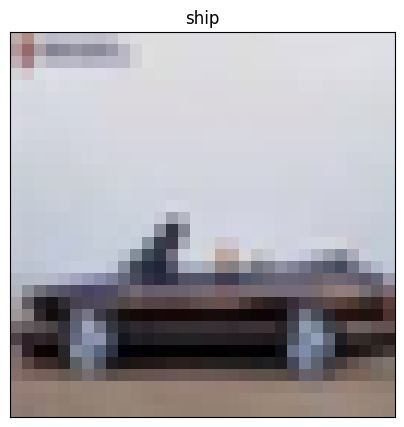

In [26]:
n = random.randint(0,9999)
predicted_values = model.predict(test_images)

plt.figure(figsize=(5,5))
plt.imshow(test_images[n])
plt.yticks([])
plt.xticks([])
plt.title(class_names[np.argmax(predicted_values[n])])

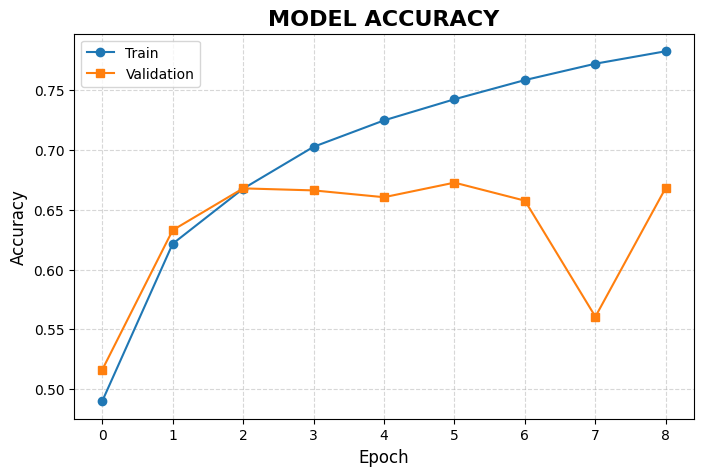

In [27]:
# Accuracy v/s Epoch graph
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], marker='o')
plt.plot(history.history['val_accuracy'], marker='s')
plt.title('MODEL ACCURACY', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# simple
# plt.figure(figsize=(8,5))
# plt.plot(history.history['accuracy'] ,  label='Train accuracy')
# plt.plot(history.history['val_accuracy'],  label='test accuracy')
# plt.title('MODEL ACCURACY')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend()
# plt.show()

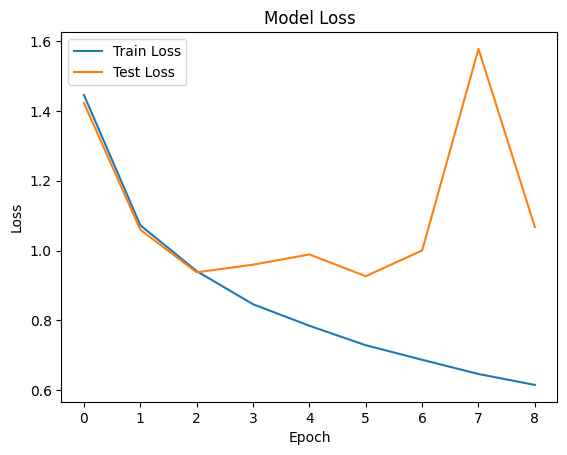

In [28]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()